In [15]:
from agent import DDPGAgent
from env import make_env
from train import Trainer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import count
from IPython.display import display
plt.style.use('dark_background')

In [70]:
agent = DDPGAgent.load_from_checkpoint(
    # checkpoint_path='runs/Jan01_20-41-03_epyc2/checkpoints/30-134.08036049552572.pth',
    # checkpoint_path='runs/Jan01_20-41-03_epyc2/checkpoints/90-245.9343441082599.pth',
    # checkpoint_path='runs/Jan01_20-41-03_epyc2/checkpoints/130-1488.4118916731636.pth',
    # checkpoint_path='runs/Jan01_21-39-43_epyc2/checkpoints/50-1326.3536583575547.pth',
    # checkpoint_path='runs/Jan01_21-57-54_epyc2/checkpoints/30-890.8960370431523.pth',
    checkpoint_path='runs/Jan01_23-12-03_epyc2/checkpoints/10-3065.6313761407073.pth',
    hparams_file='runs/Jan01_23-12-03_epyc2/hparams.yaml'
)

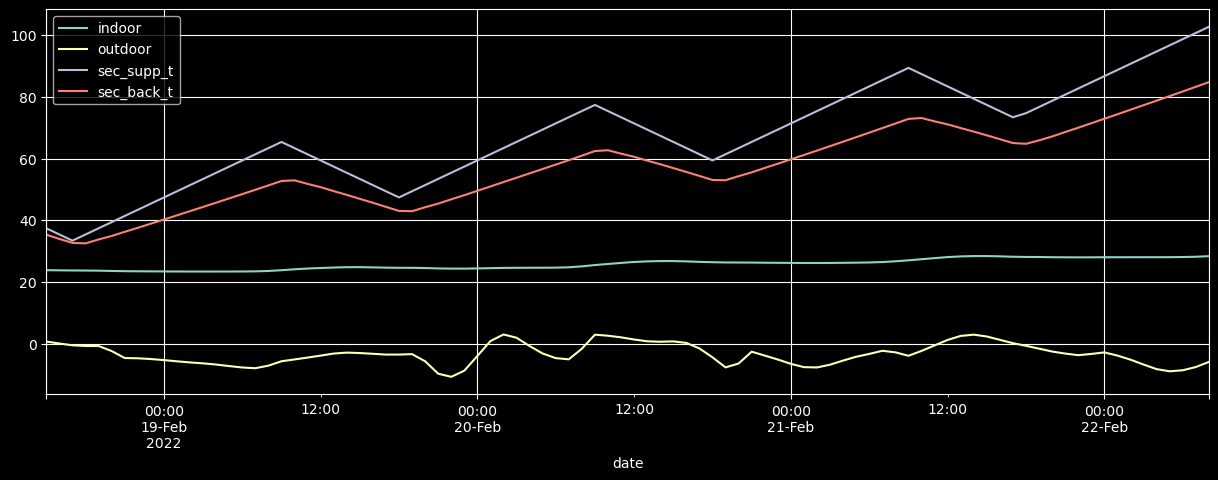

In [99]:
agent = DDPGAgent.load_from_checkpoint(
    checkpoint_path='runs/Jan01_21-57-54_epyc2/checkpoints/30-890.8960370431523.pth',
    hparams_file='runs/Jan01_21-57-54_epyc2/hparams.yaml'
)
env = make_env()
trainer = Trainer(agent, env)
agent = DDPGAgent(
    state_dim=env.observation_space.shape[0],
    action_dim=env.action_space.shape[0]
)
trainer.test(True)

In [ ]:
env = make_env()
trainer = Trainer(agent, env)
agent = DDPGAgent(
    state_dim=env.observation_space.shape[0],
    action_dim=env.action_space.shape[0]
)
trainer.test(True)

In [43]:
episodes = 1
for episode in range(episodes):
    state, info = env.reset()
    episode_reward = 0
    rewards = []
    for step in count():
        action = agent.act(state)
        state, reward, done, truncated, info = env.step(action)
        rewards.append(rewards)
        episode_reward += reward
        if truncated:
            break
        if done:
            pass
            # break
X = env.X.dropna()
X[['indoor', 'outdoor', 'sec_supp_t', 'sec_back_t']].plot()
plt.plot(pd.Series(np.array(rewards), index=X.index))

AttributeError: 'DDPGAgent' object has no attribute 'act'